In [1]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install prettytable

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for prettytable from https://files.pythonhosted.org/packages/73/19/4bb9530512432774fdd7cb7c020851d4decbb811d95f86fd4f6a870a6d3e/prettytable-3.12.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [4]:
# IMPORT PACKAGES

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from prettytable import PrettyTable

In [5]:
# GATHER DATA, SET HYPERPARAMETERS

batch_size = 32
learning_rate = 0.001
num_epochs = 29
# decided on 29 after trying more
data_dir = '/home/tzj7qc/pet_images'

In [7]:
# PREPARE DATA FOR MODEL

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Split the training dataset into training and validation sets
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_subset, val_subset = random_split(full_dataset, [train_size, val_size])

# Data loaders for training and validation subsets
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

In [8]:
# PREPARE MODEL FOR TRAINING

model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(full_dataset.classes))  # Adjust the output layer to match the number of classes
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')

/home/tzj7qc/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tzj7qc/.local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# PREPARE MODEL, MORE

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# TRAIN MODEL, TRACKING LOSSES

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    
    # Training phase
    for images, labels in train_loader:
        images, labels = images.to('cuda'), labels.to('cuda')

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
    
    # Calculate training loss
    train_loss = running_train_loss / len(train_loader)
    
    # Validation phase
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to('cuda'), labels.to('cuda')

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()

    # Calculate validation loss
    val_loss = running_val_loss / len(val_loader)

    # Print training and validation losses
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Epoch [1/29], Train Loss: 2.1317, Validation Loss: 2.1576
Epoch [2/29], Train Loss: 1.3175, Validation Loss: 1.7280
Epoch [3/29], Train Loss: 1.0205, Validation Loss: 1.2229
Epoch [4/29], Train Loss: 0.7542, Validation Loss: 2.0086
Epoch [5/29], Train Loss: 0.6071, Validation Loss: 1.2719
Epoch [6/29], Train Loss: 0.4975, Validation Loss: 1.0650
Epoch [7/29], Train Loss: 0.3933, Validation Loss: 1.2221
Epoch [8/29], Train Loss: 0.3645, Validation Loss: 1.7774
Epoch [9/29], Train Loss: 0.2878, Validation Loss: 1.3713
Epoch [10/29], Train Loss: 0.2756, Validation Loss: 1.4874
Epoch [11/29], Train Loss: 0.2221, Validation Loss: 1.4180
Epoch [12/29], Train Loss: 0.1953, Validation Loss: 1.1202
Epoch [13/29], Train Loss: 0.2102, Validation Loss: 1.6307
Epoch [14/29], Train Loss: 0.2060, Validation Loss: 1.3022
Epoch [15/29], Train Loss: 0.1843, Validation Loss: 1.3261
Epoch [16/29], Train Loss: 0.1497, Validation Loss: 1.1991
Epoch [17/29], Train Loss: 0.1354, Validation Loss: 2.0720
Epoch 

Overall Test Accuracy: 73.14%

Per-Class Accuracy:
Abyssinian: 61.76%
Bengal: 85.11%
Birman: 97.22%
Bombay: 91.89%
British_Shorthair: 81.08%
Egyptian_Mau: 70.00%
Maine_Coon: 88.00%
Persian: 75.68%
Ragdoll: 39.02%
Russian_Blue: 85.71%
Siamese: 40.62%
Sphynx: 81.40%
american_bulldog: 54.76%
american_pit_bull_terrier: 75.00%
basset_hound: 90.91%
beagle: 49.09%
boxer: 54.05%
chihuahua: 73.68%
english_cocker_spaniel: 58.06%
english_setter: 63.89%
german_shorthaired: 61.90%
great_pyrenees: 78.79%
havanese: 90.24%
japanese_chin: 73.53%
keeshond: 92.50%
leonberger: 88.64%
miniature_pinscher: 53.85%
newfoundland: 80.49%
pomeranian: 82.93%
pug: 92.50%
saint_bernard: 72.97%
samoyed: 77.36%
scottish_terrier: 71.11%
shiba_inu: 61.11%
staffordshire_bull_terrier: 71.79%
wheaten_terrier: 59.46%
yorkshire_terrier: 70.27%

Classification Report:
                            precision    recall  f1-score   support

                Abyssinian       0.81      0.62      0.70        34
                    Ben

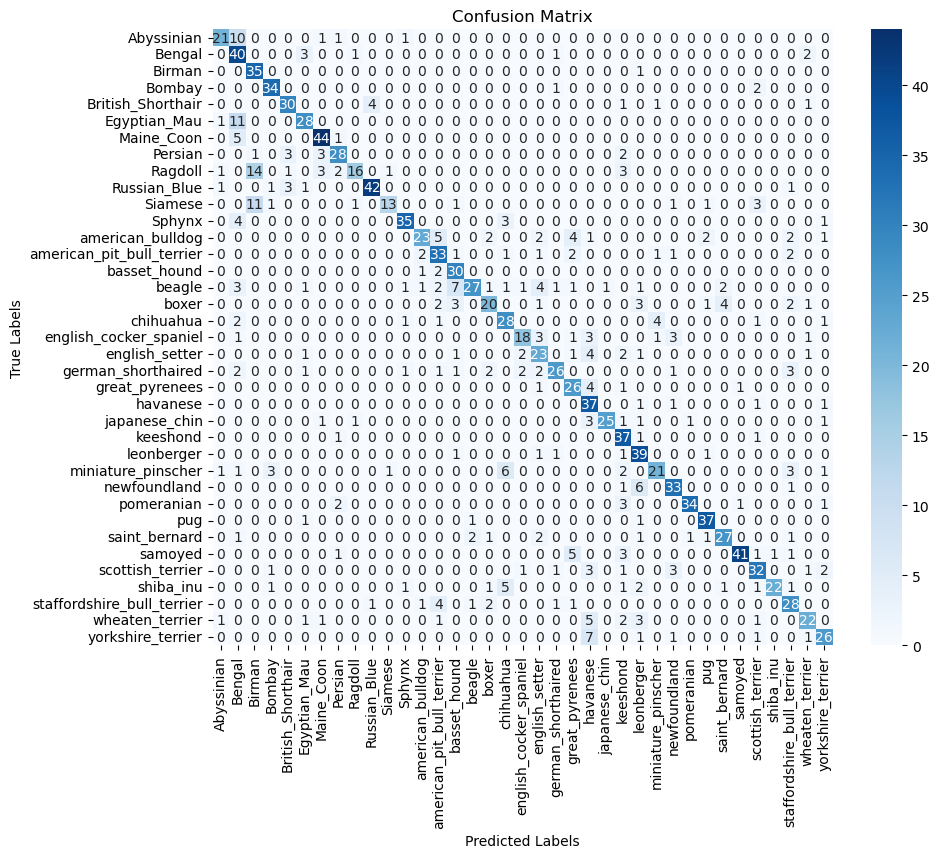

In [14]:
# EVALUATE MODEL ON TEST DATA

# Initialize variables for tracking predictions
all_preds = []
all_labels = []

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Accumulate predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Overall accuracy
accuracy = 100 * correct / total
print(f"Overall Test Accuracy: {accuracy:.2f}%")

# Per-class accuracy
classes = val_loader.dataset.dataset.classes  # Assumes ImageFolder structure
conf_matrix = confusion_matrix(all_labels, all_preds)
print("\nPer-Class Accuracy:")
for idx, class_name in enumerate(classes):
    class_accuracy = 100 * conf_matrix[idx, idx] / conf_matrix[idx].sum()
    print(f"{class_name}: {class_accuracy:.2f}%")

# Classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Confusion Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# EVALUATE MODEL ON CHARLOTTESVILLE RESCUE DATA

# Path to the folder containing test images
test_images_path = "/home/tzj7qc/rescue_test_images"

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Match input size for ResNet-50
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test dataset
rescue_test_dataset = datasets.ImageFolder(test_images_path, transform=test_transforms)
rescue_test_loader = DataLoader(rescue_test_dataset, batch_size=1, shuffle=False)

# Classes for rescue_test_images (test set classes)
rescue_classes = rescue_test_dataset.classes

# Classes for the model (training set classes)
model_classes = train_loader.dataset.dataset.classes

# Map test set classes to their indices in the model's class list
class_mapping = {rescue_class: model_classes.index(rescue_class) for rescue_class in rescue_classes}

# Classify the images and store results
results = []

model.eval()
with torch.no_grad():
    for images, labels in rescue_test_loader:
        images = images.to('cuda')
        outputs = model(images)

        # Select only predictions corresponding to the rescue classes
        relevant_outputs = outputs[:, list(class_mapping.values())]
        _, predicted_idx = torch.max(relevant_outputs, 1)

        # Map predicted index to rescue classes
        predicted_class = rescue_classes[predicted_idx.item()]

        # Append results: Image file name, true class, predicted class
        image_path = rescue_test_dataset.samples[len(results)][0]
        true_class = rescue_classes[labels.item()]
        results.append({"Image": os.path.basename(image_path), 
                        "True Class": true_class, 
                        "Predicted Class": predicted_class})

# Convert results to a DataFrame for easier manipulation
results_df = pd.DataFrame(results)

# Display results in a table
table = PrettyTable(["Image", "True Class", "Predicted Class"])
for _, row in results_df.iterrows():
    table.add_row([row["Image"], row["True Class"], row["Predicted Class"]])

print(table)

+--------------------+----------------------------+----------------------------+
|       Image        |         True Class         |      Predicted Class       |
+--------------------+----------------------------+----------------------------+
| Marilyn_Monroe.png |         Maine_Coon         |         Maine_Coon         |
|    Snickers.png    |          Persian           |          Persian           |
|      Ivy.png       | american_pit_bull_terrier  | staffordshire_bull_terrier |
|      Mars.png      | american_pit_bull_terrier  | american_pit_bull_terrier  |
|      Fig.png       |           beagle           |           beagle           |
|    Quinlan.png     |           beagle           |           beagle           |
|     Layla.png      |         pomeranian         |         pomeranian         |
|      Ruby.png      |       saint_bernard        |       saint_bernard        |
|      Blue.png      | staffordshire_bull_terrier | american_pit_bull_terrier  |
|      Maya.png      | staff